In [28]:
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv("datasets/DiseaseAndSymptoms.csv")
df

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.isna().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

### Missing values are a Headache 

#### Lets just keep symptom_1 to symptom_3 its clean and I will KNN impute Symptom_4,5 and 6 and drop all other symptoms they are useless because of no contribution 

In [31]:
X = df[['Symptom_1','Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6']]
y = df['Disease']

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for col in X.columns:
    # Check if the column has missing values
    if X[col].isnull().any():
        # Create a mask to identify non-null values
        mask = X[col].notnull()
        # Apply label encoding only to non-null values
        X.loc[mask, col] = label_encoder.fit_transform(X.loc[mask, col])
    else:
        # Encode all values if no missing values
        X[col] = label_encoder.fit_transform(X[col])

y = label_encoder.fit_transform(y)


C:\Users\irfan\AppData\Local\Temp\ipykernel_21376\2378631800.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\irfan\AppData\Local\Temp\ipykernel_21376\2378631800.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\irfan\AppData\Local\Temp\ipykernel_21376\2378631800.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [33]:
X.isna().sum()

Symptom_1       0
Symptom_2       0
Symptom_3       0
Symptom_4     348
Symptom_5    1206
Symptom_6    1986
dtype: int64

In [34]:
from sklearn.impute import KNNImputer

# Select the columns for imputation
columns_to_impute = ['Symptom_4', 'Symptom_5', 'Symptom_6']

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation for selected columns
X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


C:\Users\irfan\AppData\Local\Temp\ipykernel_21376\1743606979.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[columns_to_impute] = imputer.fit_transform(X[columns_to_impute])


In [35]:
X.isna().sum()

Symptom_1    0
Symptom_2    0
Symptom_3    0
Symptom_4    0
Symptom_5    0
Symptom_6    0
dtype: int64

In [36]:
X.describe()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,18.095122,26.941463,27.067073,24.925197,18.166185,14.059192
std,10.234807,13.968681,14.795179,14.129713,9.386657,8.341127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,15.000000,19.000000,13.000000,12.000000,8.000000
50%,15.000000,28.000000,24.000000,24.925197,17.904685,15.092025
75%,28.000000,42.000000,39.000000,36.250000,25.000000,20.000000
max,33.000000,47.000000,53.000000,49.000000,37.000000,31.000000


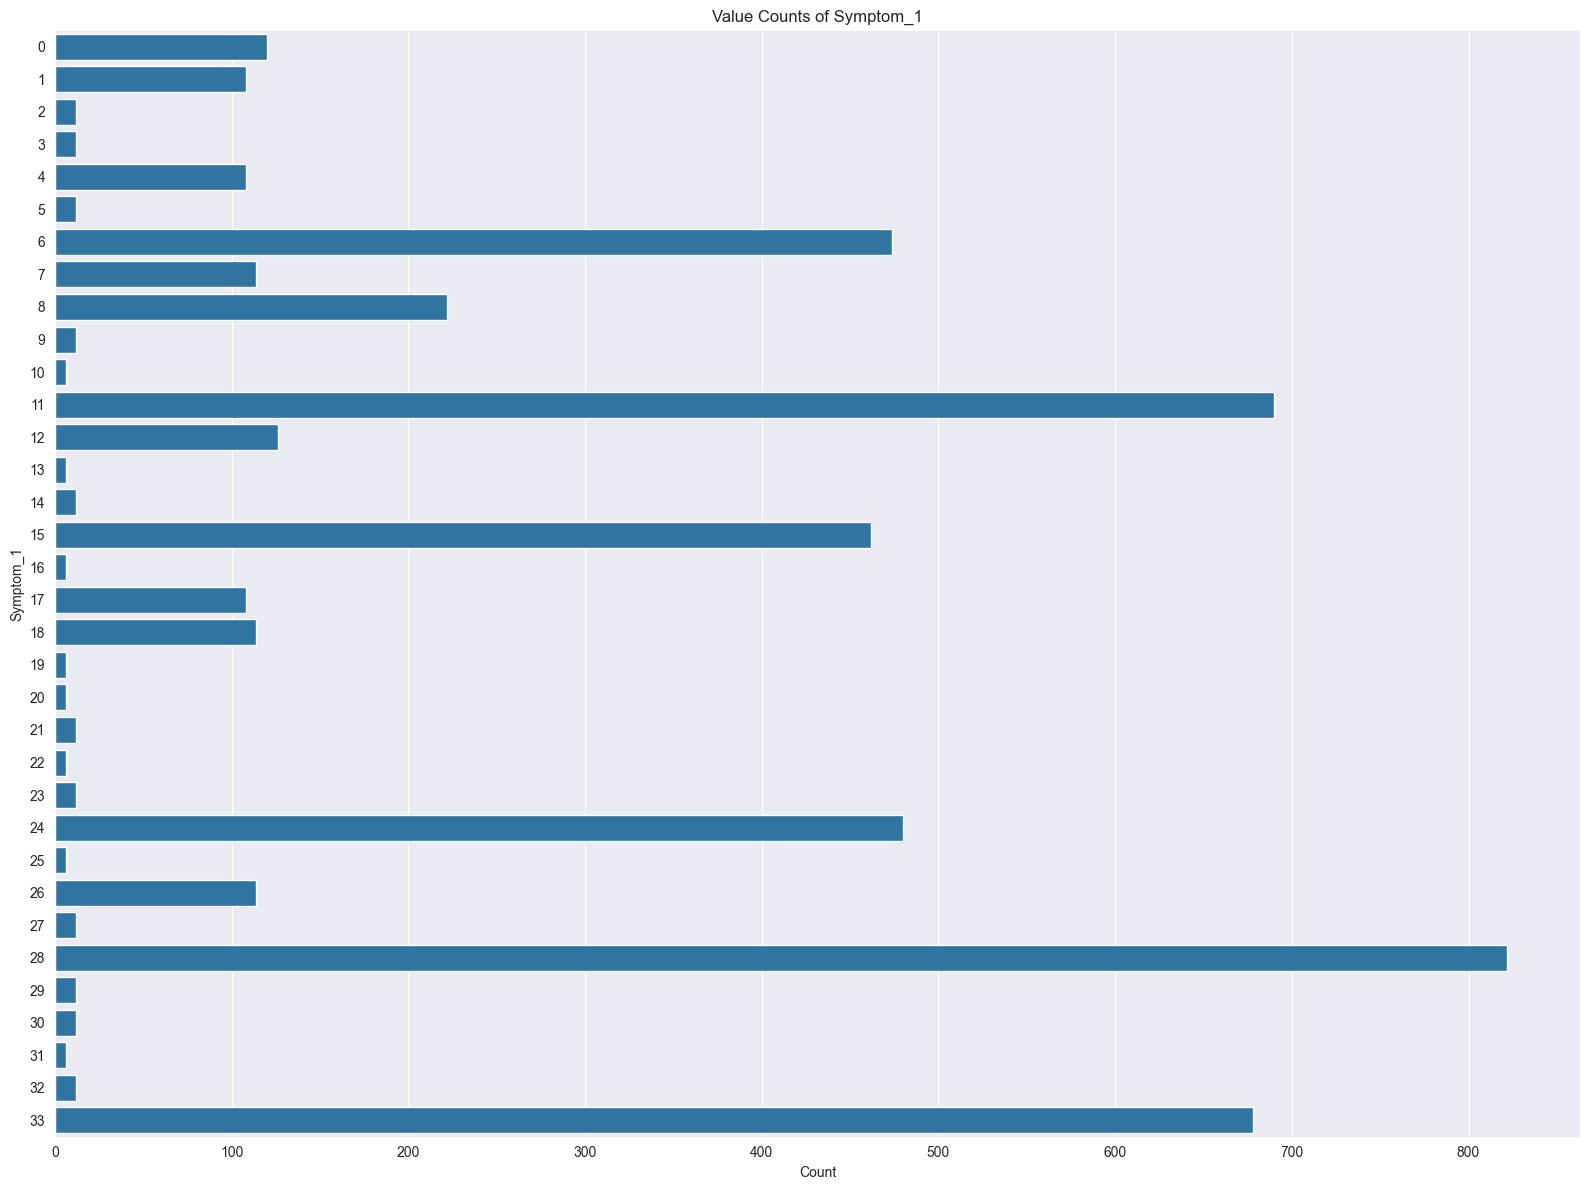

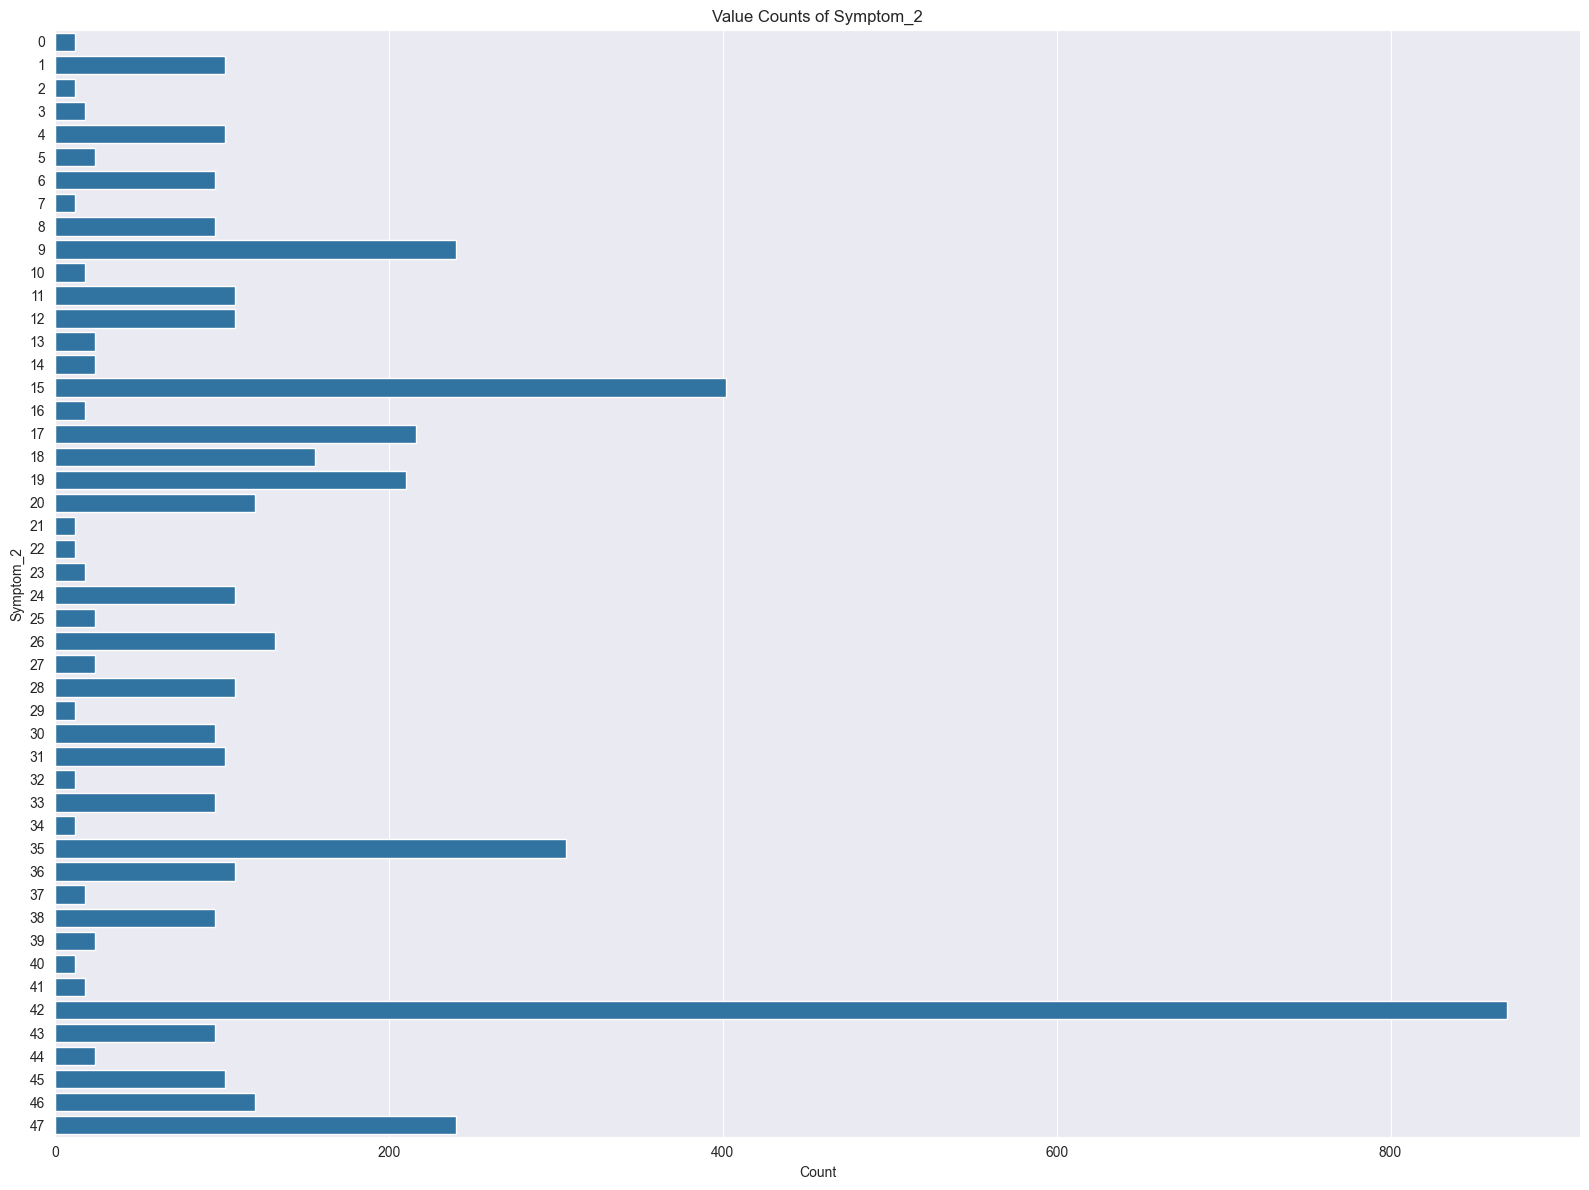

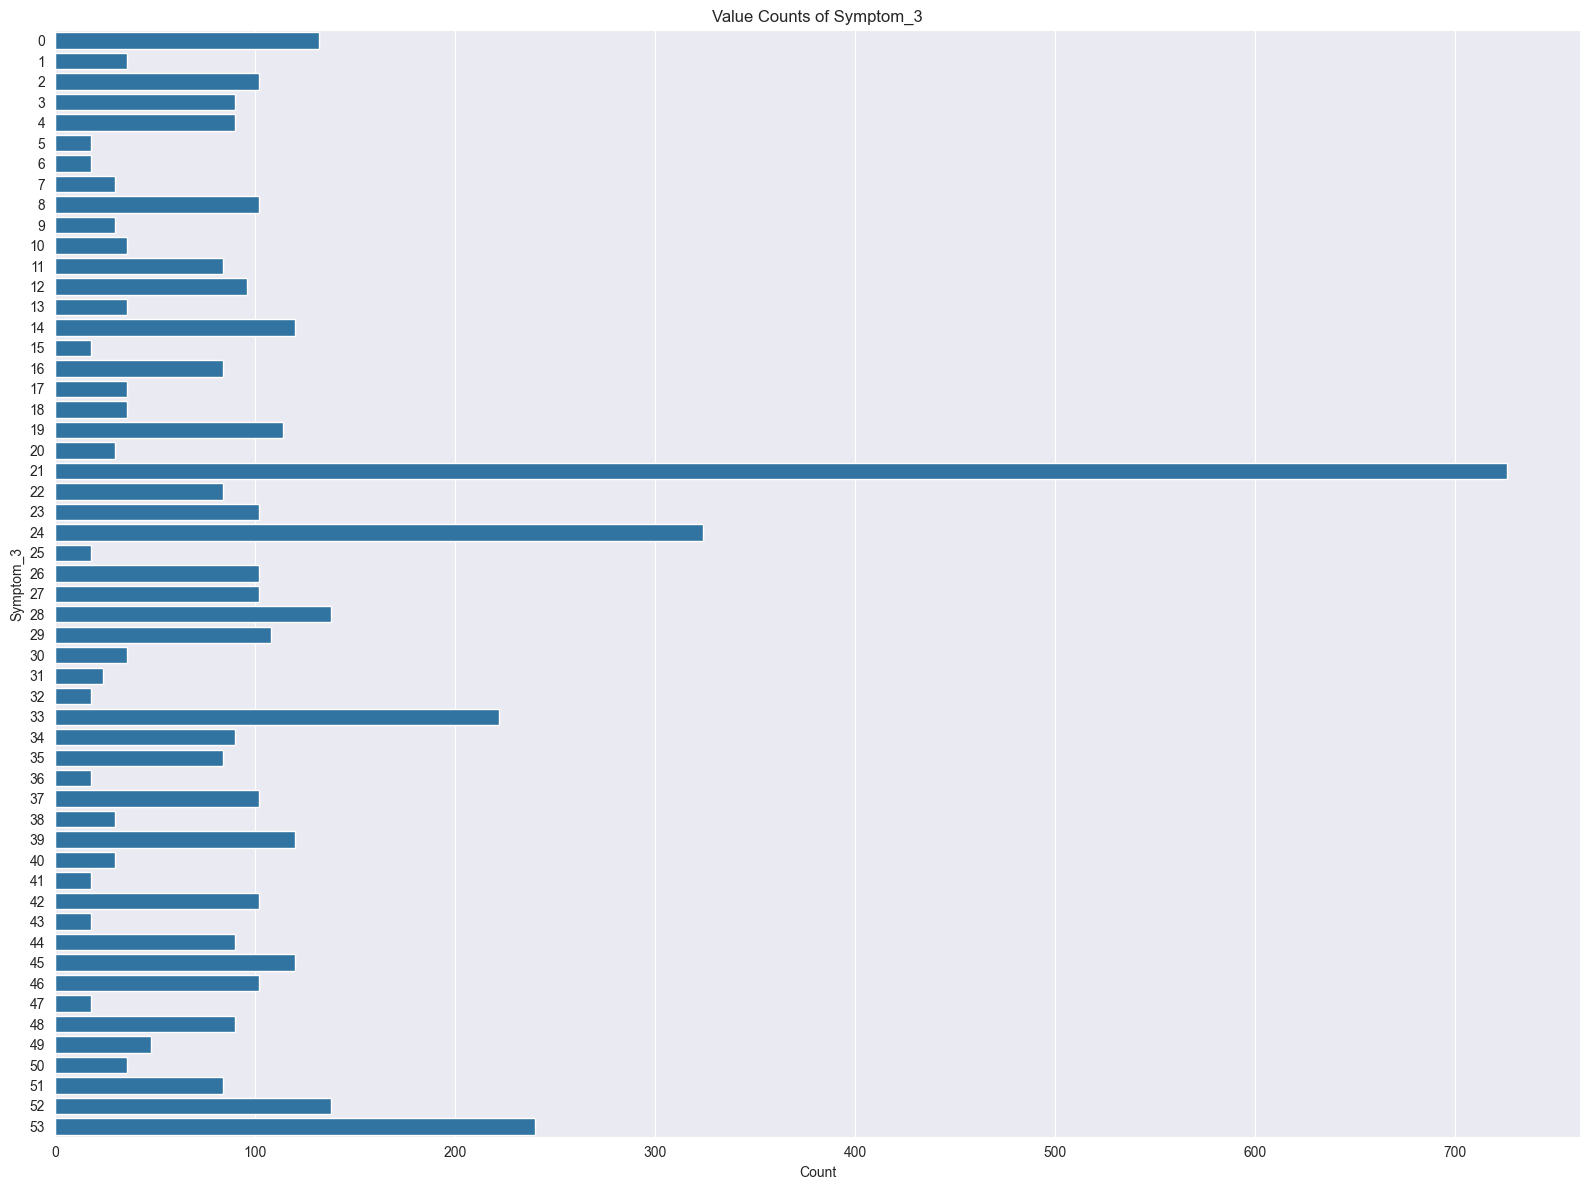

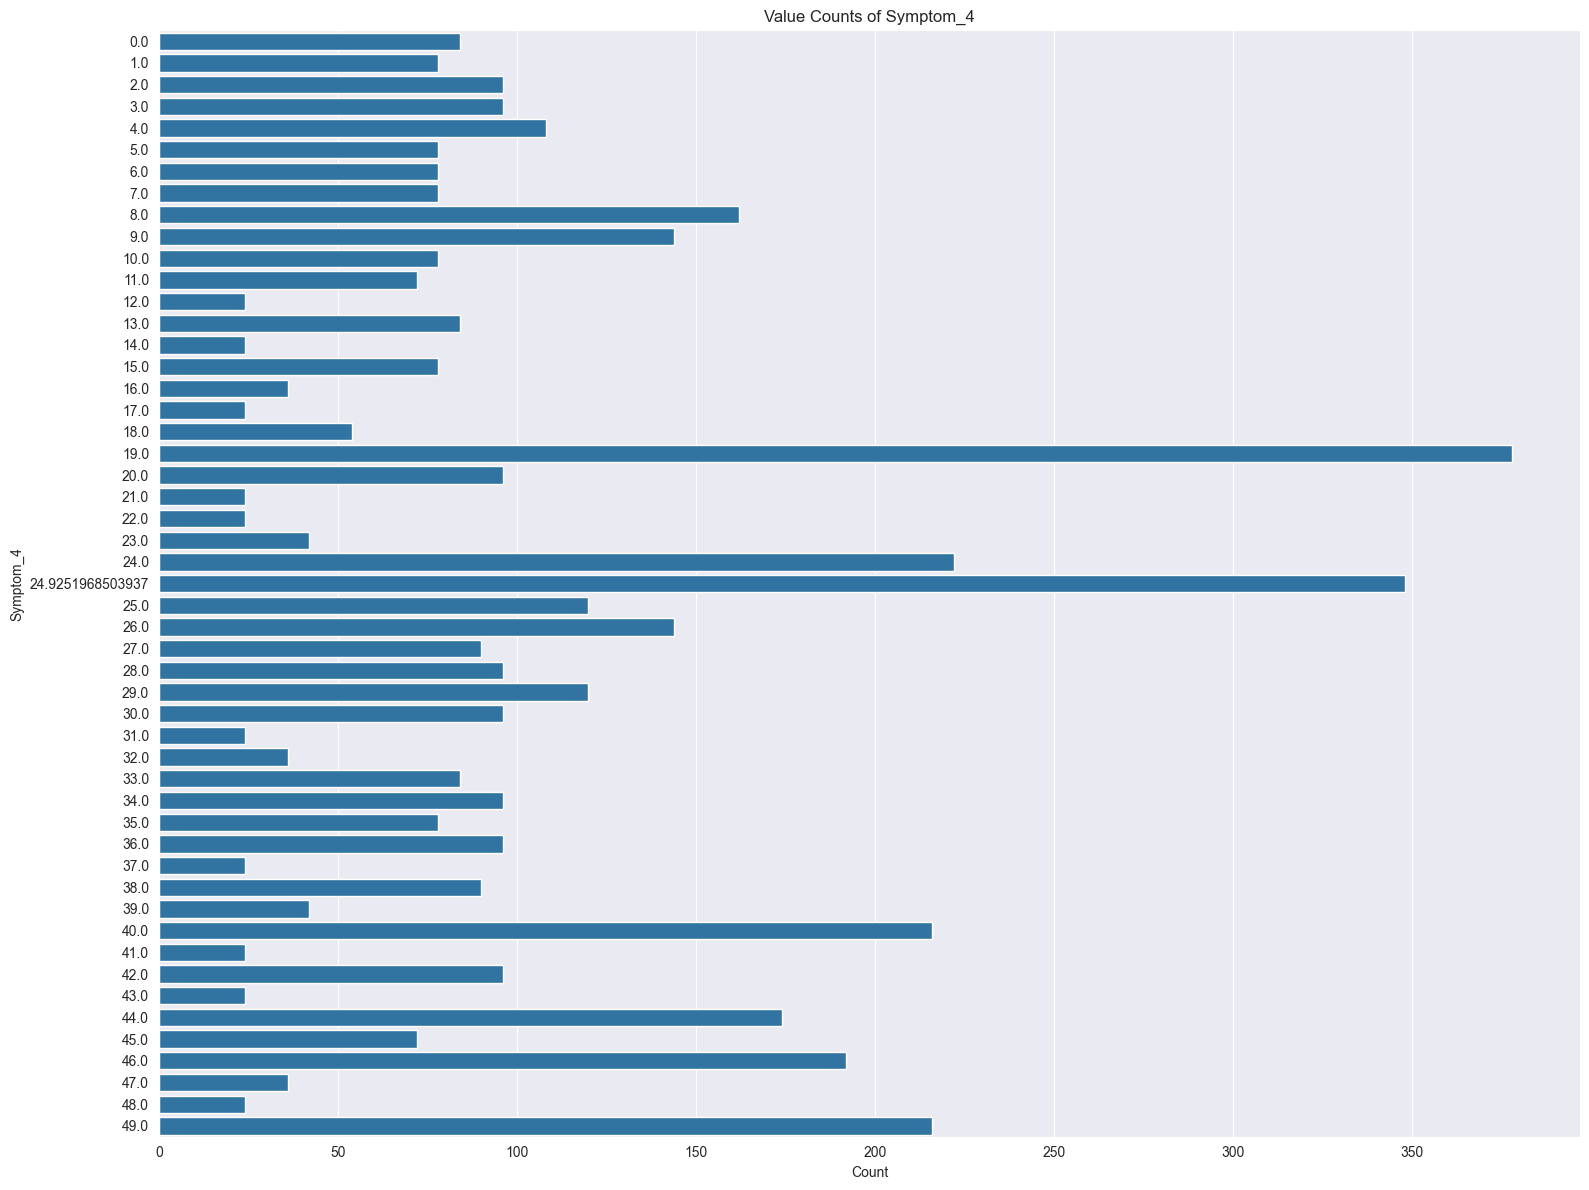

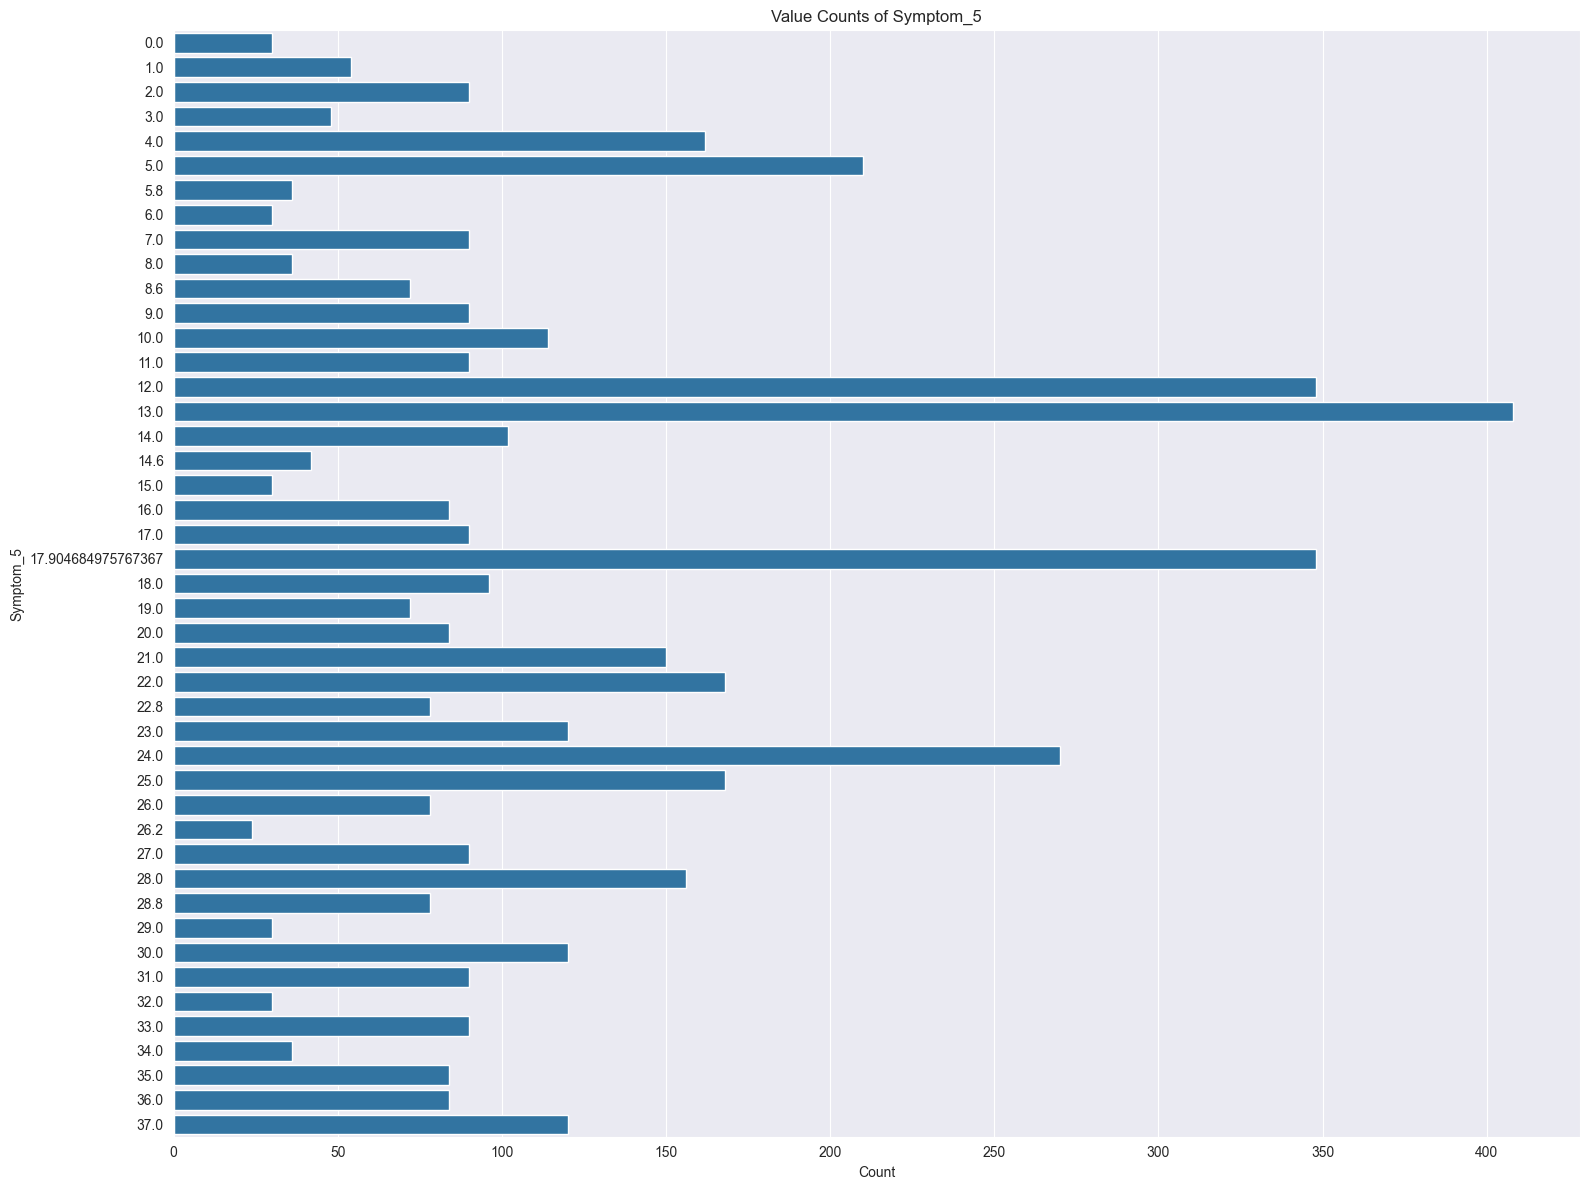

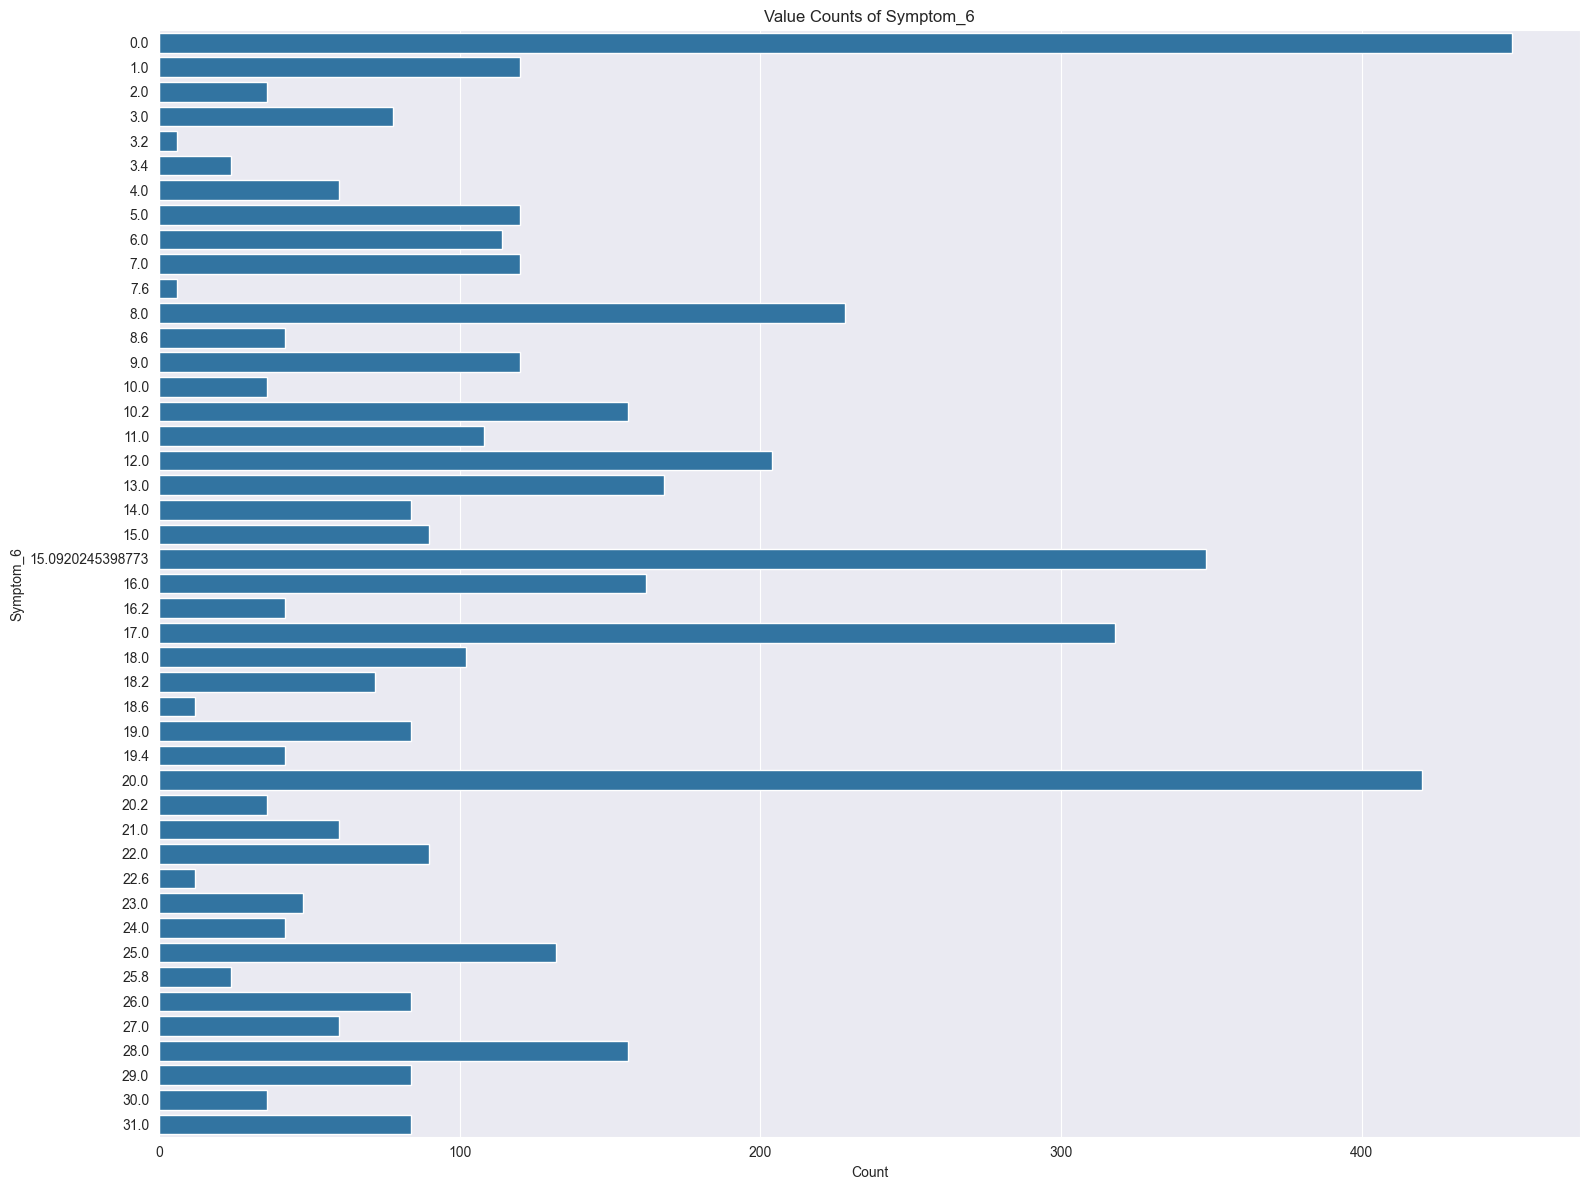

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of features
features = ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6']

# Plotting each feature individually
for feature in features:
    plt.figure(figsize=(16, 12))
    sns.countplot(y=X[feature], orient='horizontal')
    plt.title(f'Value Counts of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()


Best parameters for XGBoost Classifier:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        24
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        24
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        33
           7       1.00      1.00      1.00        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        24
          15

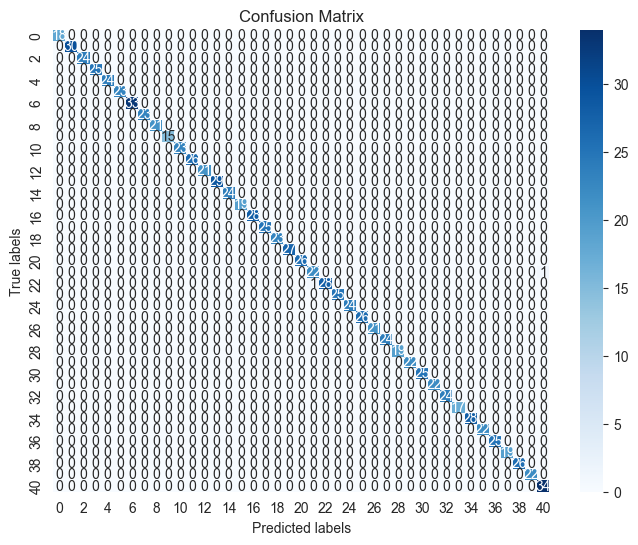

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Perform test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost classifier
xgb_classifier = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# GridSearchCV for XGBoost Classifier
xgb_grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
xgb_grid_search.fit(X_train, y_train)

# Print best parameters for XGBoost Classifier
print("Best parameters for XGBoost Classifier:")
print(xgb_grid_search.best_params_)

# Predict on the test set
y_pred = xgb_grid_search.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [41]:
# Save the model
import joblib
import torch

# Save the model as a pickle file
joblib.dump(xgb_grid_search, 'models/pickle_model.pkl')

# Save the model as a torch file
torch.save(xgb_grid_search, 'models/torch_model.pth')

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Define Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}

# GridSearchCV for Random Forest Classifier
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# Print best parameters for Random Forest Classifier
print("Best parameters for Random Forest Classifier:")
print(rf_grid_search.best_params_)

Best parameters for Random Forest Classifier:
{'max_depth': 5, 'n_estimators': 200}


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        30
           2       0.88      0.88      0.88        24
           3       1.00      1.00      1.00        25
           4       1.00      0.96      0.98        24
           5       0.96      1.00      0.98        23
           6       0.87      1.00      0.93        33
           7       1.00      0.87      0.93        23
           8       1.00      0.90      0.95        21
           9       1.00      1.00      1.00        15
          10       1.00      0.96      0.98        23
          11       0.66      0.73      0.69        26
          12       0.88      1.00      0.93        21
          13       1.00      1.00      1.00        29
          14       1.00      0.96      0.98        24
          15       1.00      0.84      0.91        19
          16       0.85      1.00      0.92        28
    

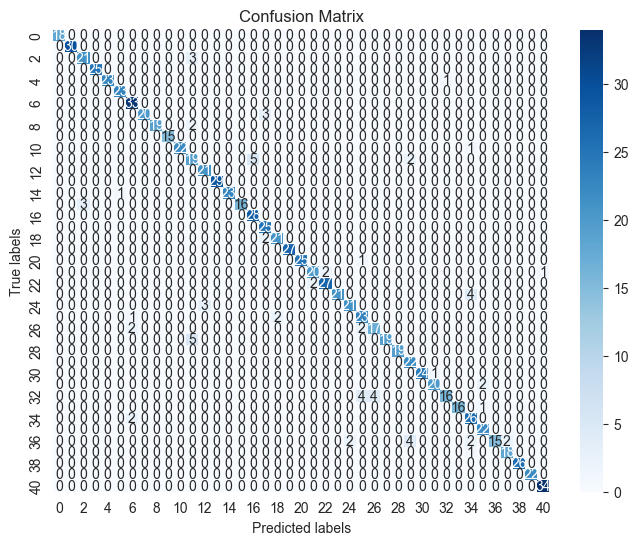

In [43]:
# Predict on the test set
y_pred = rf_grid_search.predict(X_test)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()